### Supervised, Semi-Supervised, and Unsupervised Learning
#### (a) Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [96]:
import pandas as pd
import numpy as np

In [97]:
dataset = pd.read_csv('wdbc.data', header=None)
dataset = dataset.iloc[:, 1:]
dataset.replace('M', 1, inplace=True)
dataset.replace('B', 0, inplace=True)

positiveDataset = dataset[dataset[1]==1]
negativeeDataset = dataset[dataset[1]==0]
dataset
# positiveDataset

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [98]:
xTest = positiveDataset.iloc[:71, 1:].append(negativeeDataset.iloc[:71, 1:])
yTest = positiveDataset.iloc[:71, 0].append(negativeeDataset.iloc[:71, 0])

xTrain = positiveDataset.iloc[71:, 1:].append(negativeeDataset.iloc[71:, 1:])
yTrain = positiveDataset.iloc[71:, 0].append(negativeeDataset.iloc[71:, 0])
xTrain

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
121,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,0.1966,0.06213,...,22.250,24.90,145.40,1549.0,0.15030,0.22910,0.3272,0.16740,0.2894,0.08456
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.22480,0.3222,0.08009
126,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.06130,...,16.890,35.64,113.20,848.7,0.14710,0.28840,0.3796,0.13290,0.3470,0.07900
127,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,...,22.320,25.73,148.20,1538.0,0.10210,0.22640,0.3207,0.12180,0.2841,0.06541
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.5673,0.17320,0.3305,0.08465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905


In [99]:
xTest

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,14.160,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.16300,0.43100,0.53810,0.07879,0.3322,0.14860
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,11.020,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590


#### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.
#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [101]:
def random_split(positiveDataset, negativeeDataset, testSize):
    x_train1, x_test1, y_train1, y_test1 = train_test_split(positiveDataset.iloc[:, 1:], positiveDataset.iloc[:, 0], test_size=testSize, random_state=50)
    x_train2, x_test2, y_train2, y_test2 = train_test_split(negativeeDataset.iloc[:, 1:], negativeeDataset.iloc[:, 0], test_size=testSize, random_state=50)
    x_train = x_train1.append(x_train2)
    y_train = y_train1.append(y_train2)
    x_test = x_test1.append(x_test2)
    y_test = y_test1.append(y_test2)
    
    x_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    x_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    return x_train, y_train, x_test, y_test

In [102]:
def supervised_learning(x_train, y_train, x_test, y_test):
    c_list = [10**c for c in np.arange(-3,7, dtype=float)]
    parameters = {'C':c_list}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    # build L1 svm model
    svc = LinearSVC(penalty='l1', dual=False, C=best_C)
    svc.fit(x_train, y_train)
    
    # avg of accuracy, precision, recall, F-score, AUC
    # accuracy
    train_accuracy = svc.score(x_train, y_train)
    test_accuracy = svc.score(x_test, y_test)
    # confusion matrix
    y_train_predict = svc.predict(x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    
    # get parameter
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    # AUC
    train_predict_prob = svc.decision_function(x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)
    
#   ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score', 'Test Auc']
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

AVG Score:
 Train Accuracy     0.991630
Train Precision    0.994378
Train Recall       0.983037
Train F-Score      0.988666
Train Auc          0.999738
Test Accuracy      0.953333
Test Precision     0.964209
Test Recall        0.909302
Test F-Score       0.935680
Test Auc           0.964966
dtype: float64

Train Confusion Matrix:
 [[285   0]
 [  1 168]]
Test Confusion Matrix:
 [[71  1]
 [ 5 38]]


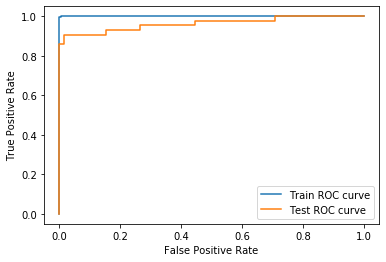

In [103]:
x_train, y_train, x_test, y_test = random_split(positiveDataset, negativeeDataset, 0.2)
normalized_x_train = pd.DataFrame(preprocessing.normalize(x_train))
normalized_x_test = pd.DataFrame(preprocessing.normalize(x_test))
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score', 'Test Auc']
supervised_stat = pd.DataFrame(columns=cols, index=range(30))
for i in range(30):
    supervised_stat.loc[i] = supervised_learning(normalized_x_train, y_train, normalized_x_test, y_test)

print('Spuervised AVG Score:\n', supervised_stat.mean())

# choose one to print and plot
# get confusion matrix and plot roc
c_list = [10**c for c in np.arange(-3,7, dtype=float)]
parameters = {'C':c_list}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(normalized_x_train, y_train)
best_C = clf.best_params_['C']
# build L1 svm model
svc = LinearSVC(penalty='l1', dual=False, C=best_C)
svc.fit(normalized_x_train, y_train)
# confusion matrix
y_train_predict = svc.predict(normalized_x_train)
y_test_predict = svc.predict(normalized_x_test)
train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('\nTrain Confusion Matrix:\n', train_confusion_matrix)
print('Test Confusion Matrix:\n', test_confusion_matrix)
# ROC
train_predict_prob = svc.decision_function(normalized_x_train)
test_predict_prob = svc.decision_function(normalized_x_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
# AUC
train_predict_prob = svc.decision_function(normalized_x_train)
test_predict_prob = svc.decision_function(normalized_x_test)
train_auc = roc_auc_score(y_train, train_predict_prob)
test_auc = roc_auc_score(y_test, test_predict_prob)

plt.plot(train_fpr, train_tpr, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, label='Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()  

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [104]:
train = pd.concat([y_train, x_train], axis=1)
label_x_train, label_y_train, unlabel_x_train, unlabel_y_train = random_split(train[train[1]==1], train[train[1]==0], 0.5)

# choose the parameter
c_list = [10**c for c in np.arange(-3,7, dtype=float)]
parameters = {'C':c_list}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(label_x_train, label_y_train)
best_C = clf.best_params_['C']
# build L1 svm model using best C
svc = LinearSVC(penalty='l1', dual=False, C=best_C)
svc.fit(label_x_train, label_y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [105]:
def semi_supervised_learning(x_train, y_train, unlabel_x_train, x_test, y_test):
    # use labeled data to train the model
    c_list = [10**c for c in np.arange(-3,7, dtype=float)]
    parameters = {'C':c_list}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(x_train, y_train)
    best_C = clf.best_params_['C']
    # build L1 svm model
    svc = LinearSVC(penalty='l1', dual=False, C=best_C)
    svc.fit(x_train, y_train)
    
    # unlabel_x_train as the unlabeled data
    # find the farthest unlabeled data
    unlabel_x = unlabel_x_train
    while len(unlabel_x) > 0:
        # calculate the distance of each data
        distance_decision_boundary = svc.decision_function(unlabel_x)
        abs_distance = np.abs(distance_decision_boundary)
        # get the index of max distance
        indx = abs_distance.argmax()
        # get the label for farthest point
        label_predict = 0 if distance_decision_boundary[indx] < 0 else 1
        # append new label into train set
        new_x_train = np.append(x_train, [unlabel_x.iloc[indx]], axis = 0)
        new_y_train = y_train.append(pd.Series(label_predict))
        # delete label from test set
        unlabel_x = unlabel_x.drop(unlabel_x.index[indx])
        # refit the model
        svc.fit(new_x_train, new_y_train)
    
    # avg of accuracy, precision, recall, F-score, AUC
    # accuracy
    train_accuracy = svc.score(new_x_train, new_y_train)
    test_accuracy = svc.score(x_test, y_test)
    # confusion matrix
    y_train_predict = svc.predict(new_x_train)
    y_test_predict = svc.predict(x_test)
    train_confusion_matrix = confusion_matrix(new_y_train, y_train_predict)
    test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
    
    # get parameter
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    # AUC
    train_predict_prob = svc.decision_function(new_x_train)
    test_predict_prob = svc.decision_function(x_test)
    train_auc = roc_auc_score(new_y_train, train_predict_prob)
    test_auc = roc_auc_score(y_test, test_predict_prob)
    
    stat = [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]
#   ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score', 'Test Auc']
    return stat, svc

In [106]:
# stat, semi_supervised_model = semi_supervised_learning(label_x_train, label_y_train, unlabel_x_train, x_test, y_test)

Semi Supervised AVG Score:
 Train Accuracy     0.991189
Train Precision    0.998039
Train Recall       0.978198
Train F-Score      0.987999
Train Auc          0.999834
Test Accuracy      0.947826
Test Precision     0.974359
Test Recall        0.883721
Test F-Score       0.926829
Test Auc           0.956632
dtype: float64

Train Confusion Matrix:
 [[285   0]
 [169   0]]
Test Confusion Matrix:
 [[72  0]
 [43  0]]


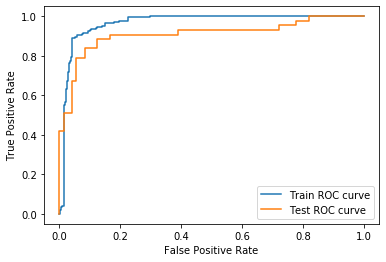

In [117]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score', 'Test Auc']
semi_stat = pd.DataFrame(columns=cols, index=range(30))
semi_supervised_model = LinearSVC(penalty='l1', dual=False)
for i in range(30):
    stat, semi_supervised_model = semi_supervised_learning(label_x_train, label_y_train, unlabel_x_train, x_test, y_test)
    semi_stat.loc[i] = stat

print('Semi Supervised AVG Score:\n', semi_stat.mean())

# choose one to print and plot
# confusion matrix
y_train_predict = semi_supervised_model.predict(normalized_x_train)
y_test_predict = semi_supervised_model.predict(normalized_x_test)
train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print('\nTrain Confusion Matrix:\n', train_confusion_matrix)
print('Test Confusion Matrix:\n', test_confusion_matrix)
# ROC
train_predict_prob = semi_supervised_model.decision_function(normalized_x_train)
test_predict_prob = semi_supervised_model.decision_function(normalized_x_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_predict_prob)
# AUC
train_predict_prob = semi_supervised_model.decision_function(normalized_x_train)
test_predict_prob = semi_supervised_model.decision_function(normalized_x_test)
train_auc = roc_auc_score(y_train, train_predict_prob)
test_auc = roc_auc_score(y_test, test_predict_prob)

plt.plot(train_fpr, train_tpr, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, label='Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()  

#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [109]:
def get_label(x_cluster, y_cluster, clusterTag, center):
    x_cluster = np.array(x_cluster)
    y_cluster = np.array(y_cluster)
    # get different cluster
    cluster = x_cluster[clusterTag]
    true_label = y_cluster[clusterTag]
    disatance_array = np.empty(0)
    
    for point in cluster:
        distance = np.linalg.norm(point - center)
        disatance_array = np.append(disatance_array, distance)
    # sort the distances
    sorted_distances = disatance_array.argsort() 
    true_label = true_label[sorted_distances[:30]]
    count = np.bincount(true_label)
    classify_cluster = np.argmax(count)
    return classify_cluster

In [110]:
def k_means(x_train, y_train, x_test, y_test):
    kmeans = KMeans(n_clusters=2, random_state=233).fit(x_train)
    train_labels = kmeans.labels_
    train_cluster_centers = kmeans.cluster_centers_
    # get two clusters center
    train_center_0 = train_cluster_centers[0]
    train_center_1 = train_cluster_centers[1]
    train_cluster_0 = np.where(train_labels==0)
    train_cluster_1 = np.where(train_labels==1)

    cluster_0 = get_label(x_train, y_train, train_cluster_0, train_center_0)
    cluster_1 = get_label(x_train, y_train, train_cluster_1, train_center_1)

    y_train_predict_labels = train_labels
    y_train_predict_labels[cluster_0] = cluster_0
    y_train_predict_labels[cluster_1] = cluster_1

    train_accuracy = accuracy_score(y_train, y_train_predict_labels)

    # get confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict_labels)

    # test data
    test_labels = kmeans.predict(x_test)
    test_cluster_0 = np.where(test_labels==0)
    test_cluster_1 = np.where(test_labels==1)
    
    test_predict_labels = test_labels
    test_predict_labels[test_cluster_0] = cluster_0
    test_predict_labels[test_cluster_1] = cluster_1
    
    test_accuracy = accuracy_score(y_test, test_predict_labels)
    test_confusion_matrix = confusion_matrix(y_test, test_predict_labels)
    # get parameter
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    # AUC
    train_auc = roc_auc_score(y_train, pd.DataFrame(kmeans.transform(x_train)).iloc[:,0])
    test_auc = roc_auc_score(y_test, pd.DataFrame(kmeans.transform(x_test)).iloc[:,0])
    
    return [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall, test_f1, test_auc]

K Means AVG Score:
 Train Accuracy     0.852423
Train Precision    0.990385
Train Recall       0.609467
Train F-Score      0.754579
Train Auc          0.913028
Test Accuracy      0.826087
Test Precision     1.000000
Test Recall        0.534884
Test F-Score       0.696970
Test Auc           0.906977
dtype: float64

Train Confusion Matrix
 [[284   1]
 [ 66 103]]
Test Confusion Matrix
 [[72  0]
 [20 23]]


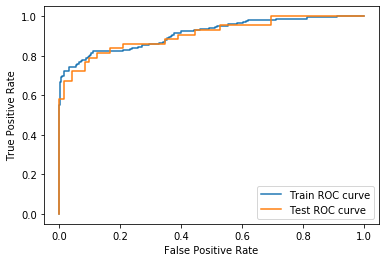

In [111]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Train Auc', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score', 'Test Auc']
kmeans_stat = pd.DataFrame(columns=cols, index=range(30))
for i in range(30):
    kmeans_stat.loc[i] = k_means(x_train, y_train, x_test, y_test)
print("K Means AVG Score:\n", kmeans_stat.mean())

kmeans = KMeans(n_clusters=2, random_state=233).fit(x_train)
train_labels = kmeans.labels_
train_cluster_centers = kmeans.cluster_centers_
# get two clusters center
train_center_0 = train_cluster_centers[0]
train_center_1 = train_cluster_centers[1]
train_cluster_0 = np.where(train_labels==0)
train_cluster_1 = np.where(train_labels==1)

cluster_0 = get_label(x_train, y_train, train_cluster_0, train_center_0)
cluster_1 = get_label(x_train, y_train, train_cluster_1, train_center_1)

y_train_predict_labels = train_labels
y_train_predict_labels[cluster_0] = cluster_0
y_train_predict_labels[cluster_1] = cluster_1

# get confusion matrix
train_confusion_matrix = confusion_matrix(y_train, y_train_predict_labels)
print('\nTrain Confusion Matrix\n', train_confusion_matrix)
# test data
test_labels = kmeans.predict(x_test)
test_cluster_0 = np.where(test_labels==0)
test_cluster_1 = np.where(test_labels==1)

test_predict_labels = test_labels
test_predict_labels[test_cluster_0] = cluster_0
test_predict_labels[test_cluster_1] = cluster_1
test_confusion_matrix = confusion_matrix(y_test, test_predict_labels)
print('Test Confusion Matrix\n', test_confusion_matrix)

# draw roc for each one time
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, pd.DataFrame(kmeans.transform(x_train)).iloc[:,0])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, pd.DataFrame(kmeans.transform(x_test)).iloc[:,0])
plt.plot(train_fpr, train_tpr, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, label='Test ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()  

#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [112]:
from sklearn.cluster import SpectralClustering

In [113]:
def spectral_cluster(x_train, y_train, x_test, y_test):
    normalized_x_train = pd.DataFrame(preprocessing.normalize(x_train))
    normalized_x_test = pd.DataFrame(preprocessing.normalize(x_test))
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    spectral_clusters = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(normalized_x_train)
    train_labels = spectral_clusters.labels_
    # get two clusters center
    train_cluster_0 = np.where(train_labels==0)
    train_cluster_1 = np.where(train_labels==1)

    cluster_0 = np.argmax(np.bincount(y_train[train_cluster_0]))
    cluster_1 = np.argmax(np.bincount(y_train[train_cluster_1]))

    y_train_predict_labels = train_labels
    y_train_predict_labels[cluster_0] = cluster_0
    y_train_predict_labels[cluster_1] = cluster_1

    train_accuracy = accuracy_score(y_train, y_train_predict_labels)

    # get confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict_labels)

    # test data
    test_labels = spectral_clusters.fit_predict(normalized_x_test)
    test_cluster_0 = np.where(test_labels==0)
    test_cluster_1 = np.where(test_labels==1)
    
    test_predict_labels = test_labels
    test_predict_labels[test_cluster_0] = cluster_0
    test_predict_labels[test_cluster_1] = cluster_1
    
    test_accuracy = accuracy_score(y_test, test_predict_labels)
    test_confusion_matrix = confusion_matrix(y_test, test_predict_labels)
    # get parameter
    train_tn, train_fp, train_fn, train_tp = train_confusion_matrix.ravel()
    test_tn, test_fp, test_fn, test_tp = test_confusion_matrix.ravel()
    # precision: p = tp/(tp+fp)
    train_precision = train_tp/(train_tp + train_fp)    
    test_precision = test_tp/(test_tp + test_fp)

    # recall: tp/(tp+fn)
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    # f1 = 2 * (P*R)/(P+R)
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    
    return [train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1]

In [122]:
cols = ['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F-Score', 'Test Accuracy',  'Test Precision', 'Test Recall', 'Test F-Score']
spectral_stat = pd.DataFrame(columns=cols, index=range(30))
for i in range(30):
    spectral_stat.loc[i] = spectral_cluster(x_train, y_train, x_test, y_test)
print("Spectral Cluster AVG Score:\n", spectral_stat.mean())

normalized_x_train = pd.DataFrame(preprocessing.normalize(x_train))
normalized_x_test = pd.DataFrame(preprocessing.normalize(x_test))
y_s_train = np.array(y_train)
y_s_test = np.array(y_test)
spectral_clusters = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(normalized_x_train)
train_labels = spectral_clusters.labels_
# get two clusters center
train_cluster_0 = np.where(train_labels==0)
train_cluster_1 = np.where(train_labels==1)

cluster_0 = np.argmax(np.bincount(y_s_train[train_cluster_0]))
cluster_1 = np.argmax(np.bincount(y_s_train[train_cluster_1]))

y_train_predict_labels = train_labels
y_train_predict_labels[cluster_0] = cluster_0
y_train_predict_labels[cluster_1] = cluster_1

# get confusion matrix
train_confusion_matrix = confusion_matrix(y_s_train, y_train_predict_labels)
print('\nTrain Confusion Matrix\n', train_confusion_matrix)
# test data
test_labels = spectral_clusters.fit_predict(normalized_x_test)
test_cluster_0 = np.where(test_labels==0)
test_cluster_1 = np.where(test_labels==1)

test_predict_labels = test_labels
test_predict_labels[test_cluster_0] = cluster_0
test_predict_labels[test_cluster_1] = cluster_1

test_confusion_matrix = confusion_matrix(y_s_test, test_predict_labels)
print('Test Confusion Matrix\n', test_confusion_matrix)

Spectral Cluster AVG Score:
 Train Accuracy     0.628488
Train Precision    0.699752
Train Recall       0.570020
Train F-Score      0.613279
Test Accuracy      0.455362
Test Precision     0.441820
Test Recall        0.470543
Test F-Score       0.445021
dtype: float64

Train Confusion Matrix
 [[282   3]
 [ 49 120]]
Test Confusion Matrix
 [[65  7]
 [12 31]]


#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [123]:
results = pd.DataFrame({'supervised':supervised_stat.mean(), 
                              'semi_supervised':semi_stat.mean(),
                              'k_means':kmeans_stat.mean(), 
                              'spectral_unsupervised':spectral_stat.mean()})
results

,supervised,semi_supervised,k_means,spectral_unsupervised
Test Accuracy,0.953333,0.947826,0.826087,0.455362
Test Auc,0.964966,0.956632,0.906977,NaN
Test F-Score,0.935680,0.926829,0.696970,0.445021
Test Precision,0.964209,0.974359,1.000000,0.441820
Test Recall,0.909302,0.883721,0.534884,0.470543
Train Accuracy,0.991630,0.991189,0.852423,0.628488
Train Auc,0.999738,0.999834,0.913028,NaN
Train F-Score,0.988666,0.987999,0.754579,0.613279
Train Precision,0.994378,0.998039,0.990385,0.699752
Train Recall,0.983037,0.978198,0.609467,0.570020


### 2. Active Learning Using Support Vector Machines
#### (a) Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [126]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
x_data = df.iloc[:, 0:4]
y_data = df[4]
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=472/(900+472))

#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [157]:
def select_data(train_x, train_y):
    x_select = pd.DataFrame()
    y_select = pd.DataFrame()
    # make sure two kind of classes are included
    while len(y_select) < 1 or len(np.bincount(y_select)) < 2 or np.bincount(y_select).min() < 2:
        # random select 10
        random_indexes = np.ramdom.randint(0, len(train_x), 10)
        x_select = train_x.iloc[random_indexes]
        y_select = train_y.iloc[random_indexes]
    # the remian x
    remain_x_data = train_x.drop(train_x.index[random_indexes])
    remain_y_data = train_y.drop(train_x.index[random_indexes])
    
    # update index
    x_select = x_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    remain_x_data = remain_x_data.reset_index(drop=True)
    remain_y_data = remain_y_data.reset_index(drop=True)
    return x_select, y_select, remain_x_data, remain_y_data

In [180]:
def passive_learning(train_x, train_y, test_x, test_y):
    x_select = pd.DataFrame()
    y_select = pd.DataFrame()
    # make sure two kind of classes are included
    while len(y_select) < 1 or len(np.bincount(y_select)) < 2 or np.bincount(y_select).min() < 2:
        # random select 10
        random_indexes = np.random.randint(0, len(train_x), 10)
        x_select = train_x.iloc[random_indexes]
        y_select = train_y.iloc[random_indexes]
    # the remian x
    remain_x_data = train_x.drop(train_x.index[random_indexes])
    remain_y_data = train_y.drop(train_x.index[random_indexes])
    
    # update index
    x_select = x_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    remain_x_data = remain_x_data.reset_index(drop=True)
    remain_y_data = remain_y_data.reset_index(drop=True)
    
    
#     x_select, y_select, remain_x_data, remain_y_data = select_data(train_x, train_y)
    
    errors = list()
    for i in range(90):
        if i < 2:
            CV = 5
        else:
            CV = 10
        parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=CV)
        clf.fit(x_select, y_select)
        best_C = clf.best_params_['C']
        
        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(x_select, y_select)
        errors.append(1-svc.score(test_x, test_y))
        
        if i != 0:
            # select 10 data from remain dataset
            new_x = remain_x_data.sample(n=10, replace=False, random_state=None, axis=0)
            random_indexes = np.array(new_x.index)
#             print(random_indexes)
#             print(len(remain_x_data), '\n')
            # append data to train set
            x_select = pd.concat([x_select, remain_x_data.iloc[random_indexes]],axis=0, ignore_index=True)
            y_select = pd.concat([y_select, remain_y_data.iloc[random_indexes]],axis=0, ignore_index=True)
            # delete from remain data
            remain_x_data = remain_x_data.drop(remain_x_data.index[random_indexes])
            remain_y_data = remain_y_data.drop(remain_y_data.index[random_indexes])

            #reset index
            remain_x_data = remain_x_data.reset_index(drop=True)
            remain_y_data = remain_y_data.reset_index(drop=True)
    return errors

In [181]:
passive_error_list = list()
for i in range(50):
    print(i+1,' time')
    error = passive_learning(train_x, train_y, test_x, test_y)
    passive_error_list.append(error)
passive_error_list = pd.DataFrame(passive_error_list).T
passive_error_list

1  time
2  time
3  time
4  time
5  time
6  time
7  time
8  time
9  time
10  time
11  time
12  time
13  time
14  time
15  time
16  time
17  time
18  time
19  time
20  time
21  time
22  time
23  time
24  time
25  time
26  time
27  time
28  time
29  time
30  time
31  time
32  time
33  time
34  time
35  time
36  time
37  time
38  time
39  time
40  time
41  time
42  time
43  time
44  time
45  time
46  time
47  time
48  time
49  time
50  time


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.228814,0.091102,0.150424,0.173729,0.158898,0.222458,0.023305,0.190678,0.262712,0.156780,...,0.023305,0.250000,0.057203,0.046610,0.161017,0.273305,0.173729,0.069915,0.135593,0.197034
1,0.228814,0.091102,0.150424,0.137712,0.158898,0.222458,0.023305,0.190678,0.262712,0.156780,...,0.023305,0.250000,0.057203,0.046610,0.161017,0.273305,0.173729,0.069915,0.135593,0.190678
2,0.114407,0.033898,0.171610,0.067797,0.040254,0.186441,0.027542,0.150424,0.038136,0.031780,...,0.012712,0.040254,0.025424,0.052966,0.116525,0.029661,0.042373,0.052966,0.078390,0.038136
3,0.019068,0.027542,0.127119,0.095339,0.040254,0.033898,0.023305,0.038136,0.038136,0.033898,...,0.048729,0.033898,0.072034,0.038136,0.016949,0.014831,0.019068,0.082627,0.082627,0.036017
4,0.025424,0.027542,0.048729,0.095339,0.029661,0.016949,0.023305,0.059322,0.036017,0.025424,...,0.046610,0.033898,0.091102,0.021186,0.019068,0.019068,0.019068,0.019068,0.031780,0.042373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.014831,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,...,0.014831,0.021186,0.016949,0.014831,0.014831,0.014831,0.014831,0.019068,0.014831,0.014831
86,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,...,0.014831,0.021186,0.016949,0.014831,0.014831,0.014831,0.014831,0.019068,0.014831,0.014831
87,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,...,0.014831,0.021186,0.016949,0.014831,0.014831,0.014831,0.014831,0.019068,0.014831,0.014831
88,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.014831,0.014831,0.014831


In [188]:
passive_error_list = pd.DataFrame(passive_error_list).T
passive_error_list

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.228814,0.228814,0.114407,0.019068,0.025424,0.029661,0.033898,0.033898,0.027542,0.021186,...,0.014831,0.019068,0.019068,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
1,0.091102,0.091102,0.033898,0.027542,0.027542,0.046610,0.036017,0.040254,0.019068,0.031780,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.014831,0.014831,0.014831,0.014831
2,0.150424,0.150424,0.171610,0.127119,0.048729,0.042373,0.038136,0.057203,0.046610,0.046610,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
3,0.173729,0.137712,0.067797,0.095339,0.095339,0.095339,0.033898,0.021186,0.033898,0.027542,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
4,0.158898,0.158898,0.040254,0.040254,0.029661,0.016949,0.019068,0.033898,0.023305,0.023305,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
5,0.222458,0.222458,0.186441,0.033898,0.016949,0.027542,0.014831,0.016949,0.014831,0.023305,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
6,0.023305,0.023305,0.027542,0.023305,0.023305,0.023305,0.025424,0.023305,0.023305,0.019068,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
7,0.190678,0.190678,0.150424,0.038136,0.059322,0.019068,0.033898,0.033898,0.029661,0.033898,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
8,0.262712,0.262712,0.038136,0.038136,0.036017,0.036017,0.019068,0.044492,0.040254,0.040254,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949
9,0.156780,0.156780,0.031780,0.033898,0.025424,0.042373,0.023305,0.025424,0.025424,0.021186,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831


#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set3 using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM4 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [190]:
def active_learning(train_x, train_y, test_x, test_y):
    x_select = pd.DataFrame()
    y_select = pd.DataFrame()
    # make sure two kind of classes are included
    while len(y_select) < 1 or len(np.bincount(y_select)) < 2 or np.bincount(y_select).min() < 2:
        # random select 10
        random_indexes = np.random.randint(0, len(train_x), 10)
        x_select = train_x.iloc[random_indexes]
        y_select = train_y.iloc[random_indexes]
    # the remian x
    remain_x_data = train_x.drop(train_x.index[random_indexes])
    remain_y_data = train_y.drop(train_x.index[random_indexes])
    
    # update index
    x_select = x_select.reset_index(drop=True)
    y_select = y_select.reset_index(drop=True)
    remain_x_data = remain_x_data.reset_index(drop=True)
    remain_y_data = remain_y_data.reset_index(drop=True)
    
    errors = list()
    for i in range(90):
#         if i < 2:
#             CV = 5
#         else:
#             CV = 10
        
        parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=5)
        clf.fit(x_select, y_select)
        best_C = clf.best_params_['C']
        
        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(x_select, y_select)
        errors.append(1-svc.score(test_x, test_y))
        
        if i != 0:
            distances = svc.decision_function(remain_x_data)
            closest_indexes = np.argsort(abs(distances))[:10]
            
            # append data to train set
            x_select = pd.concat([x_select, remain_x_data.iloc[closest_indexes]],axis=0, ignore_index=True)
            y_select = pd.concat([y_select, remain_y_data.iloc[closest_indexes]],axis=0, ignore_index=True)
            # delete from remain data
            remain_x_data = remain_x_data.drop(remain_x_data.index[closest_indexes])
            remain_y_data = remain_y_data.drop(remain_y_data.index[closest_indexes])

            #reset index
            remain_x_data = remain_x_data.reset_index(drop=True)
            remain_y_data = remain_y_data.reset_index(drop=True)
    return errors

In [191]:
active_error_list = list()
for i in range(50):
    print(i+1,' time')
    error = active_learning(train_x, train_y, test_x, test_y)
    active_error_list.append(error)
active_error_list = pd.DataFrame(active_error_list)
active_error_list

1  time
2  time
3  time
4  time
5  time
6  time
7  time
8  time
9  time
10  time
11  time
12  time
13  time
14  time
15  time
16  time
17  time
18  time
19  time
20  time
21  time
22  time
23  time
24  time
25  time
26  time
27  time
28  time
29  time
30  time
31  time
32  time
33  time
34  time
35  time
36  time
37  time
38  time
39  time
40  time
41  time
42  time
43  time
44  time
45  time
46  time
47  time
48  time
49  time
50  time


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.173729,0.220339,0.097458,0.108051,0.059322,0.375000,0.175847,0.173729,0.042373,0.148305,...,0.154661,0.040254,0.120763,0.095339,0.173729,0.139831,0.375000,0.188559,0.197034,0.184322
1,0.173729,0.220339,0.050847,0.061441,0.059322,0.375000,0.175847,0.173729,0.042373,0.148305,...,0.158898,0.055085,0.120763,0.137712,0.173729,0.139831,0.375000,0.188559,0.213983,0.184322
2,0.031780,0.029661,0.021186,0.072034,0.036017,0.112288,0.023305,0.038136,0.120763,0.036017,...,0.122881,0.014831,0.059322,0.133475,0.023305,0.031780,0.309322,0.146186,0.139831,0.088983
3,0.040254,0.021186,0.069915,0.012712,0.025424,0.038136,0.033898,0.016949,0.046610,0.021186,...,0.038136,0.021186,0.031780,0.023305,0.027542,0.016949,0.135593,0.029661,0.023305,0.031780
4,0.014831,0.033898,0.023305,0.021186,0.012712,0.199153,0.055085,0.036017,0.029661,0.014831,...,0.059322,0.016949,0.023305,0.019068,0.027542,0.012712,0.025424,0.025424,0.025424,0.025424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.014831,...,0.014831,0.014831,0.016949,0.014831,0.016949,0.014831,0.014831,0.014831,0.016949,0.014831
86,0.014831,0.016949,0.014831,0.016949,0.014831,0.014831,0.014831,0.014831,0.016949,0.014831,...,0.014831,0.014831,0.016949,0.014831,0.016949,0.014831,0.014831,0.014831,0.016949,0.014831
87,0.016949,0.016949,0.014831,0.016949,0.014831,0.014831,0.016949,0.016949,0.016949,0.014831,...,0.014831,0.014831,0.016949,0.014831,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831
88,0.016949,0.016949,0.014831,0.016949,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.016949,0.014831,0.016949,0.014831,0.014831,0.014831,0.016949,0.014831


In [192]:
active_error_list = pd.DataFrame(active_error_list).T
active_error_list

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.173729,0.173729,0.031780,0.040254,0.014831,0.010593,0.010593,0.019068,0.014831,0.014831,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.014831,0.016949,0.016949,0.016949
1,0.220339,0.220339,0.029661,0.021186,0.033898,0.023305,0.021186,0.014831,0.014831,0.019068,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.014831,0.016949,0.016949,0.016949,0.016949
2,0.097458,0.050847,0.021186,0.069915,0.023305,0.014831,0.012712,0.016949,0.014831,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831
3,0.108051,0.061441,0.072034,0.012712,0.021186,0.010593,0.012712,0.021186,0.019068,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.014831,0.016949,0.016949,0.016949,0.014831
4,0.059322,0.059322,0.036017,0.025424,0.012712,0.021186,0.023305,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
5,0.375000,0.375000,0.112288,0.038136,0.199153,0.042373,0.021186,0.016949,0.014831,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
6,0.175847,0.175847,0.023305,0.033898,0.055085,0.014831,0.012712,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949
7,0.173729,0.173729,0.038136,0.016949,0.036017,0.038136,0.021186,0.019068,0.014831,0.016949,...,0.014831,0.014831,0.014831,0.016949,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949
8,0.042373,0.042373,0.120763,0.046610,0.029661,0.023305,0.023305,0.016949,0.016949,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.014831
9,0.148305,0.148305,0.036017,0.021186,0.014831,0.019068,0.014831,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949


#### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

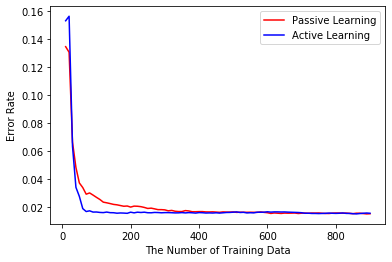

In [194]:
#plot the average result
plt.plot(np.arange(1,91)*10, passive_error_list.mean() , c='r',label='Passive Learning')
plt.plot(np.arange(1,91)*10, active_error_list.mean(), c='b', label='Active Learning')
plt.xlabel('The Number of Training Data')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#### conclusion: When the size of dataset is small, the passive learning is better than active learning. If the size is large, these two methods have the same performance